## Regresion Logistica 
### Marco Antonio Jurado 20308


In [1896]:
import numpy as np

In [1897]:
import csv
with open('framingham.csv', 'r') as file:
    csv_reader = csv.reader(file)
    datacsv = []
    for row in csv_reader:
        datacsv.append(row)

header = datacsv[0]
i = 0
for name in header:
    print(i, name)
    i +=1

0 male
1 age
2 education
3 currentSmoker
4 cigsPerDay
5 BPMeds
6 prevalentStroke
7 prevalentHyp
8 diabetes
9 totChol
10 sysBP
11 diaBP
12 BMI
13 heartRate
14 glucose
15 TenYearCHD


In [1898]:
rawDATA = np.genfromtxt('framingham.csv', delimiter=',', skip_header=True)
data = np.array(rawDATA)
print("head \n", data[:5])
print("\n\ntail \n", data[-5:])

head 
 [[  1.    39.     4.     0.     0.     0.     0.     0.     0.   195.
  106.    70.    26.97  80.    77.     0.  ]
 [  0.    46.     2.     0.     0.     0.     0.     0.     0.   250.
  121.    81.    28.73  95.    76.     0.  ]
 [  1.    48.     1.     1.    20.     0.     0.     0.     0.   245.
  127.5   80.    25.34  75.    70.     0.  ]
 [  0.    61.     3.     1.    30.     0.     0.     1.     0.   225.
  150.    95.    28.58  65.   103.     1.  ]
 [  0.    46.     3.     1.    23.     0.     0.     0.     0.   285.
  130.    84.    23.1   85.    85.     0.  ]]


tail 
 [[  1.    50.     1.     1.     1.     0.     0.     1.     0.   313.
  179.    92.    25.97  66.    86.     1.  ]
 [  1.    51.     3.     1.    43.     0.     0.     0.     0.   207.
  126.5   80.    19.71  65.    68.     0.  ]
 [  0.    48.     2.     1.    20.      nan   0.     0.     0.   248.
  131.    72.    22.    84.    86.     0.  ]
 [  0.    44.     1.     1.    15.     0.     0.     0.     0. 

Ahora se separa la X y la Y

In [1899]:
X = data[:, 12].reshape(-1, 1)
Y = data[:, -1].reshape(-1, 1)
print(X.shape)
print(Y.shape)

(4238, 1)
(4238, 1)


In [1900]:
if np.any(np.isnan(X)):
    print("Faltan datos en X.")
else:
    print("Todo bien en X.")

# Check if there are any NaN values in Y
if np.any(np.isnan(Y)):
    print("Faltan datos en Y.")
else:
    print("Todo bien en Y.")

Faltan datos en X.
Todo bien en Y.


debido a que faltan datos en X se procede a saber que porcentaje de estos es NaN

In [1901]:
print('falta un porcentaje del:')
print((np.count_nonzero(np.isnan(X)) * 100) /(X.shape[0]))

falta un porcentaje del:
0.4483246814535158


Se usara SimpleImputer para llenar los datos faltantes con el metodo de mean

In [1902]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
X = imp.fit_transform(X)
if np.any(np.isnan(X)):
    print("Faltan datos en X.")
else:
    print("Todo bien en X.")

Todo bien en X.


Ahora ya no tenemos datos faltantes en ambas variables

In [1903]:
print(X.shape)
print(Y.shape)

(4238, 1)
(4238, 1)


Procedemos a separar en test y entreno

In [1904]:
import random
combinadoZIP = list(zip(X, Y))
random.shuffle(combinadoZIP)

shuffleX, shuffleY = zip(*combinadoZIP)
shuffleX, shuffleY = np.array(shuffleX), np.array(shuffleY)

In [1905]:
np.random.seed(54)
shuffle_indices = np.random.permutation(X.shape[0])
X_shuffled = X[shuffle_indices]
Y_shuffled = Y[shuffle_indices]

entreno_temp = int(X.shape[0] * 0.7)

X_train, X_test = X_shuffled[:entreno_temp], X_shuffled[entreno_temp:]
Y_train, Y_test = Y_shuffled[:entreno_temp], Y_shuffled[entreno_temp:]

ahora las funciones que nos sirven para calcular la data donde la funcion de costo es cambiada de la de regresion lineal por la de regresion logistica. Cabe mencionar que es similar pero el detalle del sigmoide es lo que la diferencia.

In [1906]:
sigmoid = lambda X, t: 1 / (1 + np.exp(-(X @ t)))
cost = lambda X, y, t: ((sigmoid(X, t) - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

In [1907]:
def regLineal(X, y, t, cost, grad, a=0.1, n=1000, on_step=None): 
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))
        if on_step:
            on_step(t)    
    return t, costs

In [1908]:
def costoGradiente(theta, X, y, lmbd):
    h = sigmoid(X, theta)
    return ((X.T @ (h - y)) / len(y))

In [1909]:
def linear_cost(theta, X, y, lmbd):
    h = X @ theta
    reg = (lmbd / (2 * len(X))) * (theta[1:] ** 2).sum()
    return ((h - y) ** 2).sum() / (2 * len(X)) + reg

In [1910]:
def gradient_descent(theta, X, y, funcionCostos, costoGradiente, learning_rate=0.01, threshold=0.001, max_iter=10000):
    tempTheta = theta
    i = 0
    costs = []
    while np.linalg.norm(costoGradiente(tempTheta, X, y, 0.1)) > threshold and i < max_iter:
        tempTheta -= learning_rate * costoGradiente(tempTheta, X, y, 0.1)
        i += 1
        costs.append(funcionCostos(tempTheta, X, y, 0.1))
    return tempTheta, costs

In [1911]:
Xr = np.column_stack((np.ones_like(X), X))
theta_0 = np.random.rand(Xr.shape[1],1)
theta_0 = theta_0[~np.isnan(theta_0)].reshape((-1, 1))

thetass, costos = regLineal(Xr, Y, theta_0, cost, grad, a=0.0000000000000000001, n=10)

xm = np.array([[0], [len(X)]])
xmr = np.concatenate((np.ones((2, 1)), xm), axis=1)

ym = xmr @ thetass

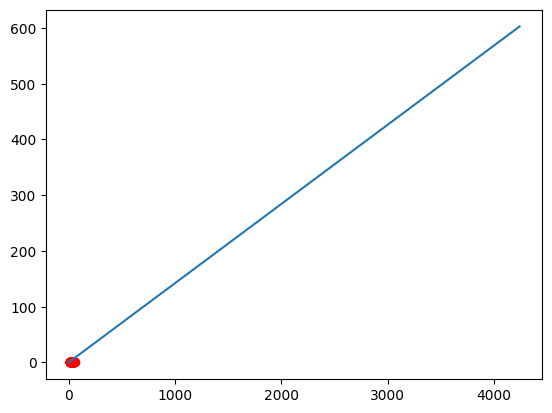

In [1912]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro') #puntos
plt.plot(xm,ym) #regresion
plt.show()

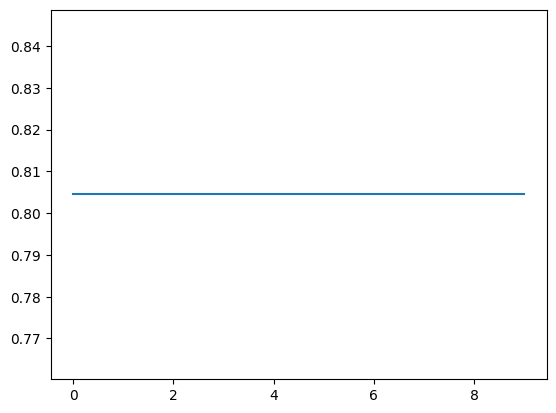

In [1913]:
plt.plot(costos) #costo
plt.show()

Procedemos a buscar el polinomio

In [1914]:
print(Y_train.shape)
print(Y_test.shape)
print(X_train.shape)
print(X_test.shape)

(2966, 1)
(1272, 1)
(2966, 1)
(1272, 1)


Investigue como funciona Cross Validation de Scikit Learn pues en ocasiones pasadas no llegue a obtener resultados faciles de comprender. Por lo tanto he llegado a comprender el funcionamiento del mismo y obtengo lo siguiente.<br>
fuente utilizada: https://scikit-learn.org/stable/modules/cross_validation.html


In [1915]:
from sklearn.metrics import r2_score, mean_squared_error

In [1916]:
def validacion(X, y, k, reg, cost, grad, a=0.1, n=1000, degree=1):
    scores,mse_s = [],[]
    temp_size = len(X) // k
    for i in range(k):
        X_test = X[i * temp_size:(i + 1) * temp_size]
        X_test_poly = np.power(X_test, degree)
        X_test_poly = np.column_stack((np.ones_like(X_test), X_test_poly))
        X_test_temp = np.power(X_test, degree)

        y_test = y[i * temp_size:(i + 1) * temp_size]

        X_train = np.concatenate([X[:i * temp_size], X[(i + 1) * temp_size:]])
        X_train_poly = np.power(X_train, degree)
        X_train_poly = np.column_stack((np.ones_like(X_train), X_train_poly))

        X_train_temp = np.power(X_train, degree) # se evaluan los polinomios
        
        y_train = np.concatenate([y[:i * temp_size], y[(i + 1) * temp_size:]])

        Xr = np.column_stack((np.ones_like(X_train), X_train_temp))
        theta_0 = np.random.rand(Xr.shape[1],1)
        theta_0 = theta_0[~np.isnan(theta_0)].reshape((-1, 1))

        t, g= reg(theta_0, Xr, y_train, cost, grad, learning_rate=a, threshold=0.001 , max_iter=n)

        # usar t para calcular predicciones
        # usar esa misma t para calcular costo con test y obtener predicciones con ese mismo t en test
        # determinar que tan accurate es con test y con train
        # determinar diferencia de costos en test y en train
        X_train_temp = np.hstack((np.ones((X_train_temp.shape[0], 1)), X_train_temp))
        pred_train = sigmoid(X_train_temp,t)
        pred_train = np.where(pred_train < 0.5, 0, pred_train)
        #pred_train = np.where(pred_train >= 0.5, 1, pred_train)



        Xr2 = np.column_stack((np.ones_like(X_test), X_test_temp))
        t2,g2 = reg(t, Xr2, y_test, cost, grad, learning_rate=a, threshold=0.001 , max_iter=n)


        X_test_temp = np.hstack((np.ones((X_test_temp.shape[0], 1)), X_test_temp))
        pred_test = sigmoid(X_test_temp,t)
        pred_test = np.where(pred_test < 0.5, 0, pred_test)

        ms1 = mean_squared_error(y_train, pred_train)
        ms2 = mean_squared_error(y_test, pred_test)
        
        mse_s.append([ms1,ms2])
        scores.append([g,g2])
        
    return np.array(scores), np.array(mse_s)

Se van a probar con 5 niveles de dificultad.

In [1917]:
res = []
tempAlfa = 0.00000001
for i in range(1,6):
    tempAlfa = tempAlfa / 1000000000000000
    score, errores = validacion(X_shuffled, Y_shuffled, k=5, reg=gradient_descent, cost=linear_cost, grad=costoGradiente, a=tempAlfa, n=1000, degree=i)
    errores = np.mean(errores, axis=0)
    res.append(score)
    print(f"El MSE en el polinomio {i} con el training set fue de {errores[0]} y con el test set fue de {errores[1]}")

El MSE en el polinomio 1 con el training set fue de 0.8479430991038412 y con el test set fue de 0.8483985014227624
El MSE en el polinomio 2 con el training set fue de 0.8479503848507319 y con el test set fue de 0.848406015358411
El MSE en el polinomio 3 con el training set fue de 0.8479504570923032 y con el test set fue de 0.8484061393152302
El MSE en el polinomio 4 con el training set fue de 0.8479504570923032 y con el test set fue de 0.8484061393152302
El MSE en el polinomio 5 con el training set fue de 0.8479504570923032 y con el test set fue de 0.8484061393152302


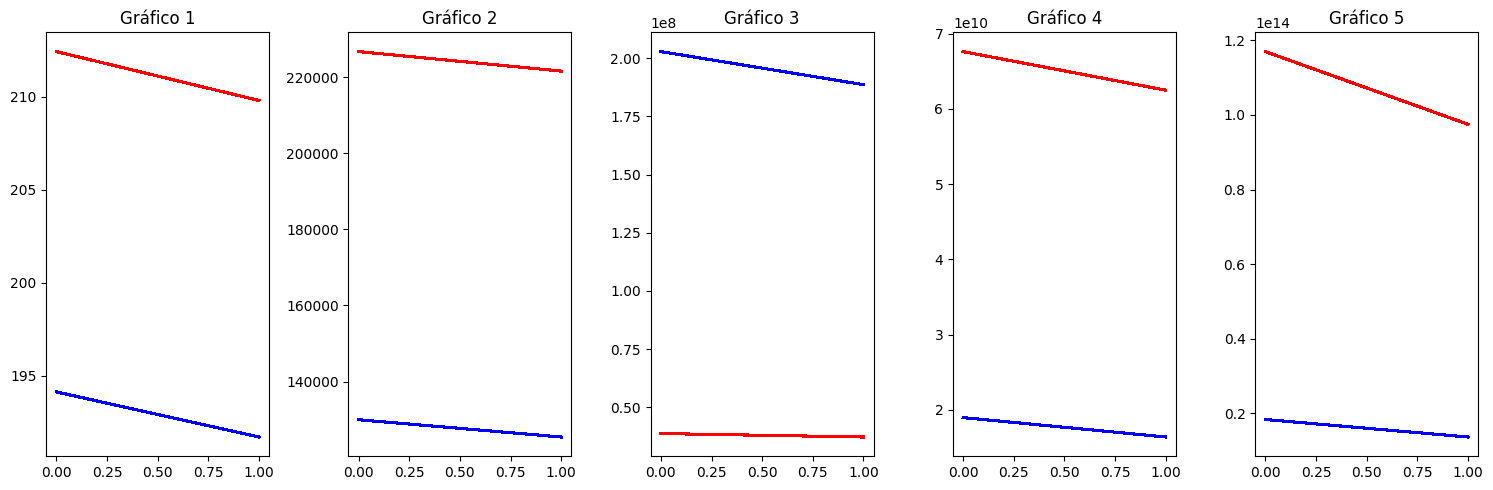

In [1918]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 5))
for i, ax in enumerate(axs):
    ax.plot(res[i][0], color='r')  # train
    ax.plot(res[i][1], color='b')  # test
    ax.set_title(f'Gráfico {i+1}')
plt.tight_layout()    
plt.show()

## conclusion
En este caso podemos ver que el MSE en el set de entrenamiento y de test en el polinomio de grado 5 fue de 0.8479504570923032 y con el test set fue de 0.8484061393152302. Así mismo cuando evaluamos el costo de dicho polinomio podemos ver que es el que menos se aleja el costo de su set de test y de entreno. Por lo tanto tenemos mejores resultados y un modelo que se apega bien a los datos del set al utilizar un polinomio de grado 5